In [8]:
# Import libraries
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [9]:
# Import data
data = pd.read_json("DATASET.json")
user_data_in = pd.read_json("USER DATA IN.json")

In [10]:
# Import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Train and test model

# Split data into features variables and target variables
X = data.drop(["Standing", "Food Budg", "Savings Budg", "Entertain Budg"], axis = 1)
Y_classification = data["Standing"]
Y_regression = data[["Food Budg", "Savings Budg", "Entertain Budg"]] 

# Encode string data (Allows RandomForest to accept string inputs)
X_enc = pd.get_dummies(X)

# Split data into training and testing sets
X_train = X_enc.head(round(len(X_enc) * 0.89))
X_test = X_enc.tail(round(len(X_enc) * 0.11))

Y_classification_train = Y_classification.head(round(len(Y_classification) * 0.89))
Y_classification_test = Y_classification.tail(round(len(Y_classification) * 0.11))
Y_regression_train = Y_regression.head(round(len(Y_regression) * 0.89))
Y_regression_test = Y_regression.tail(round(len(Y_regression) * 0.11))

# Create instances of models
model_classifier = RandomForestClassifier()
model_regression = RandomForestRegressor()

# Train models given dataset
model_classifier.fit(X_train, Y_classification_train)
model_classifier.score(X_test, Y_classification_test)

model_regression.fit(X_train, Y_regression_train)
model_regression.score(X_test, Y_regression_test)

# Make predictions based on user inputs

# Split data into user inputs and prediction outputs
X_user = user_data_in
# Encode string data (Allows RandomForest to accept string inputs)
X_user_enc = pd.get_dummies(X_user)

classification_out = model_classifier.predict(X_user_enc.tail(1))
regression_out = model_regression.predict(X_user_enc.tail(1))

# Add results to dataframe
out_array = np.append(classification_out, regression_out)
user_data_out = pd.DataFrame(data=out_array)
user_data_out.columns = ["Outputs"]
user_data_out.to_json("USER DATA OUT.json")


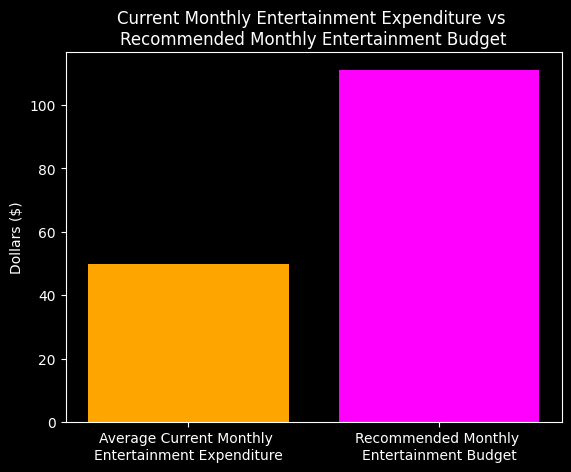

In [11]:
# Produce graphs to display current spending vs recommended budgeting

# Food graph
food_budg = data.at[len(data)-1,"Food Budg"]

food_exp_interval = (data.at[len(data)-1, "Food Exp"]).split("-")
food_exp_mean = math.floor((float(food_exp_interval[0]) + float((food_exp_interval[1])))/2)

plt.style.use('dark_background')
food_graph = plt.bar(["Average Current Monthly \nFood Expenditure","Recommended Monthly \nFood Budget"], [food_exp_mean, food_budg], color=["orange", "magenta"])
plt.ylabel("Dollars ($)")
plt.title("Current Monthly Food Expenditure vs \nRecommended Monthly Food Budget")

plt.savefig("Food Graph.png")

# Clear the current figure
plt.clf()

# Entertainment graph
entertain_budg = data.at[len(data)-1,"Entertain Budg"]

entertain_exp_interval = (data.at[len(data)-1, "Entertain Exp"]).split("-")
entertain_exp_mean = math.floor((float(entertain_exp_interval[0]) + float((entertain_exp_interval[1])))/2)

entertain_graph = plt.bar(["Average Current Monthly \nEntertainment Expenditure","Recommended Monthly \nEntertainment Budget"], [entertain_exp_mean, entertain_budg], color=["orange", "magenta"])
plt.ylabel("Dollars ($)")
plt.title("Current Monthly Entertainment Expenditure vs \nRecommended Monthly Entertainment Budget")

plt.savefig("Entertainment Graph.png")